<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-pourcentage-d'inertie-associée-à-chaque-dimension" data-toc-modified-id="Le-pourcentage-d'inertie-associée-à-chaque-dimension-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le pourcentage d'inertie associée à chaque dimension</a></span></li><li><span><a href="#L'influence-des-variables-dans-les-nouvelles-dimensions" data-toc-modified-id="L'influence-des-variables-dans-les-nouvelles-dimensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>L'influence des variables dans les nouvelles dimensions</a></span></li></ul></div>

In [1]:
import pandas as pd               
import seaborn as sns  
import warnings
import os

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

# plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)
warnings.filterwarnings(action="ignore")

os.chdir("../../donnees")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


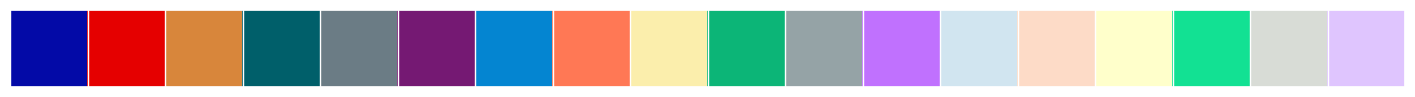

In [43]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [8]:
donnees = pd.read_csv('Iris.csv')
donnees.drop(columns='Id',inplace=True)
donnees.set_index('Species',inplace=True)
donnees.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


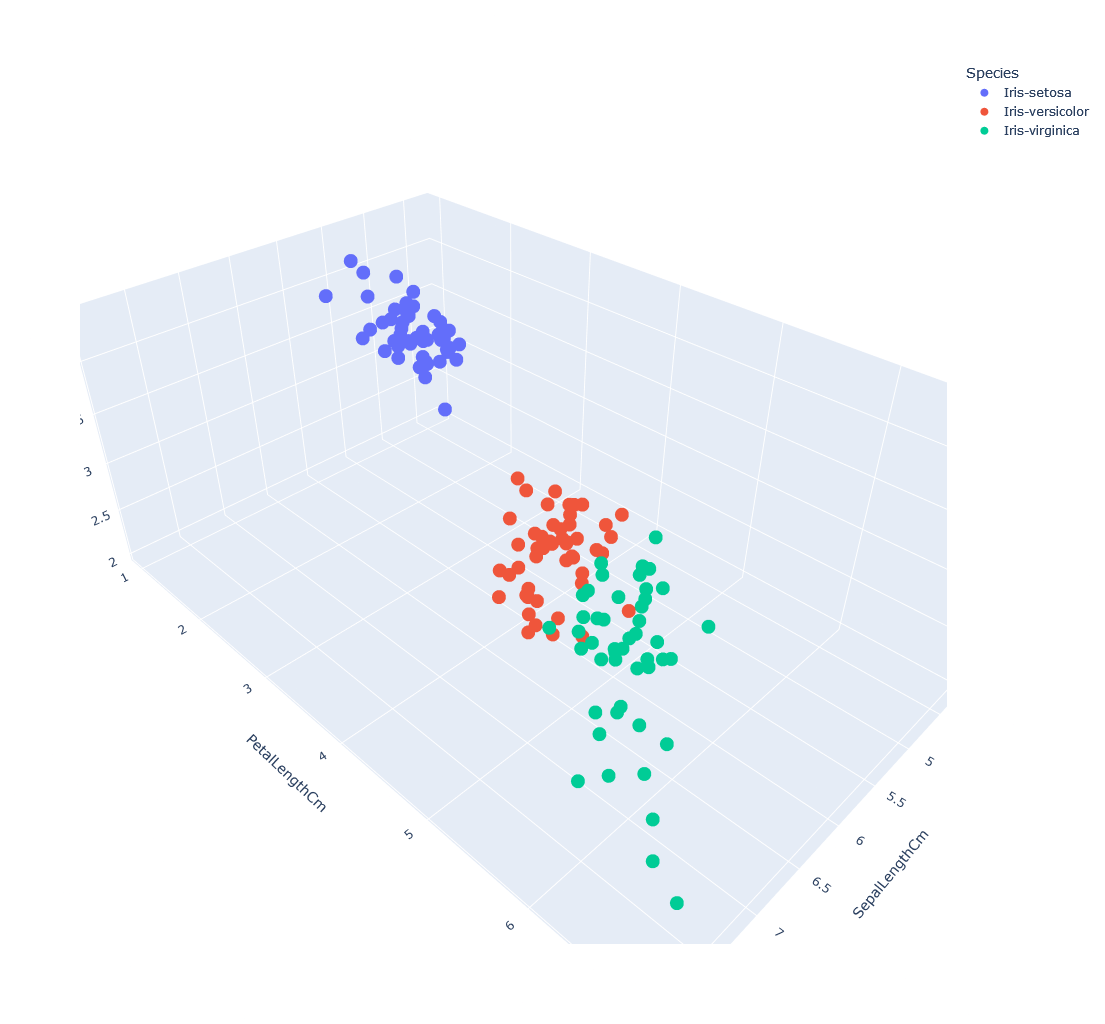

In [40]:
# layout = go.Layout({"showlegend": False})

fig = px.scatter_3d(donnees.reset_index(), 
                    x='SepalLengthCm', 
                    y='PetalLengthCm', 
                    z='SepalWidthCm',
                    color='Species',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    # text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()

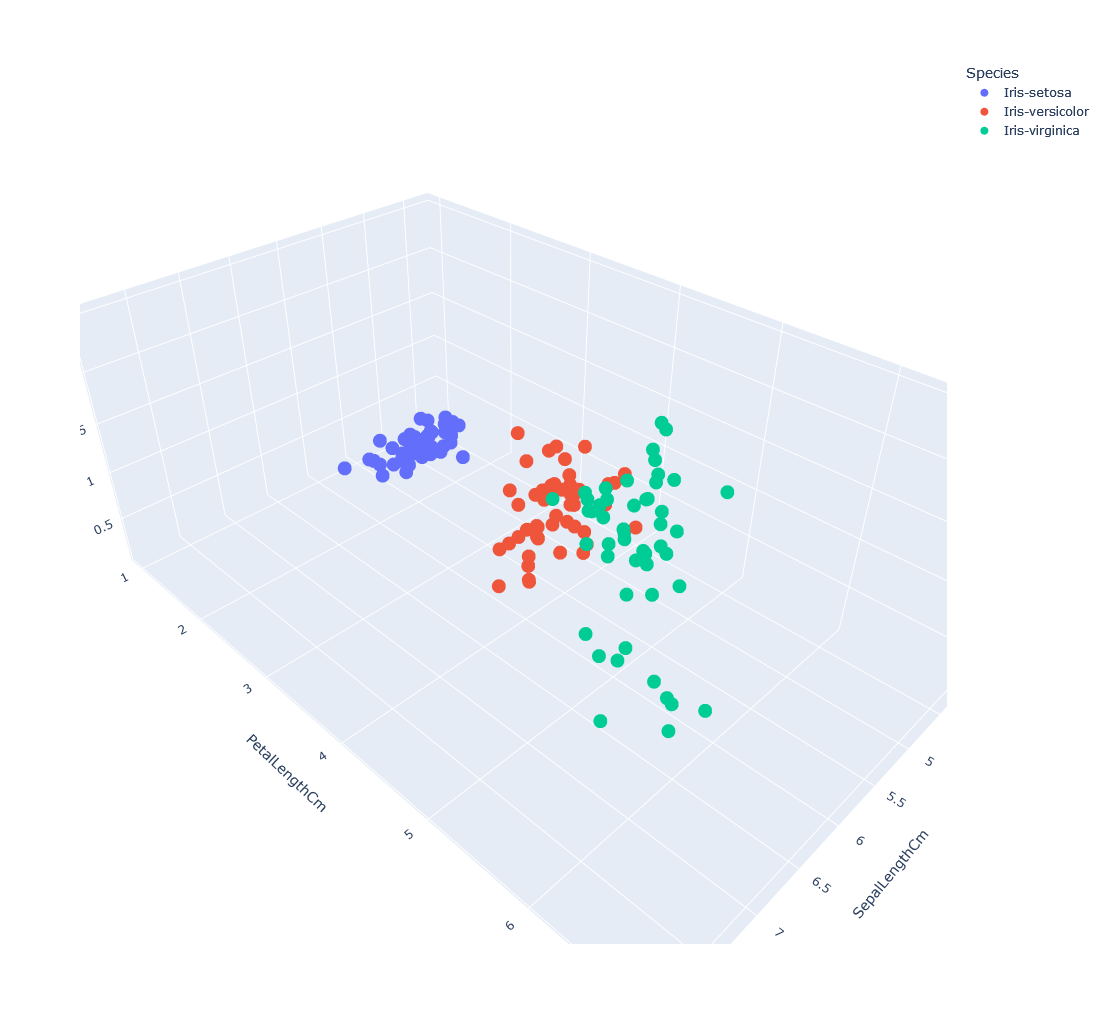

In [41]:
fig = px.scatter_3d(donnees.reset_index(), 
                    x='SepalLengthCm', 
                    y='PetalLengthCm', 
                    z='PetalWidthCm',
                    color='Species',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    # text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()

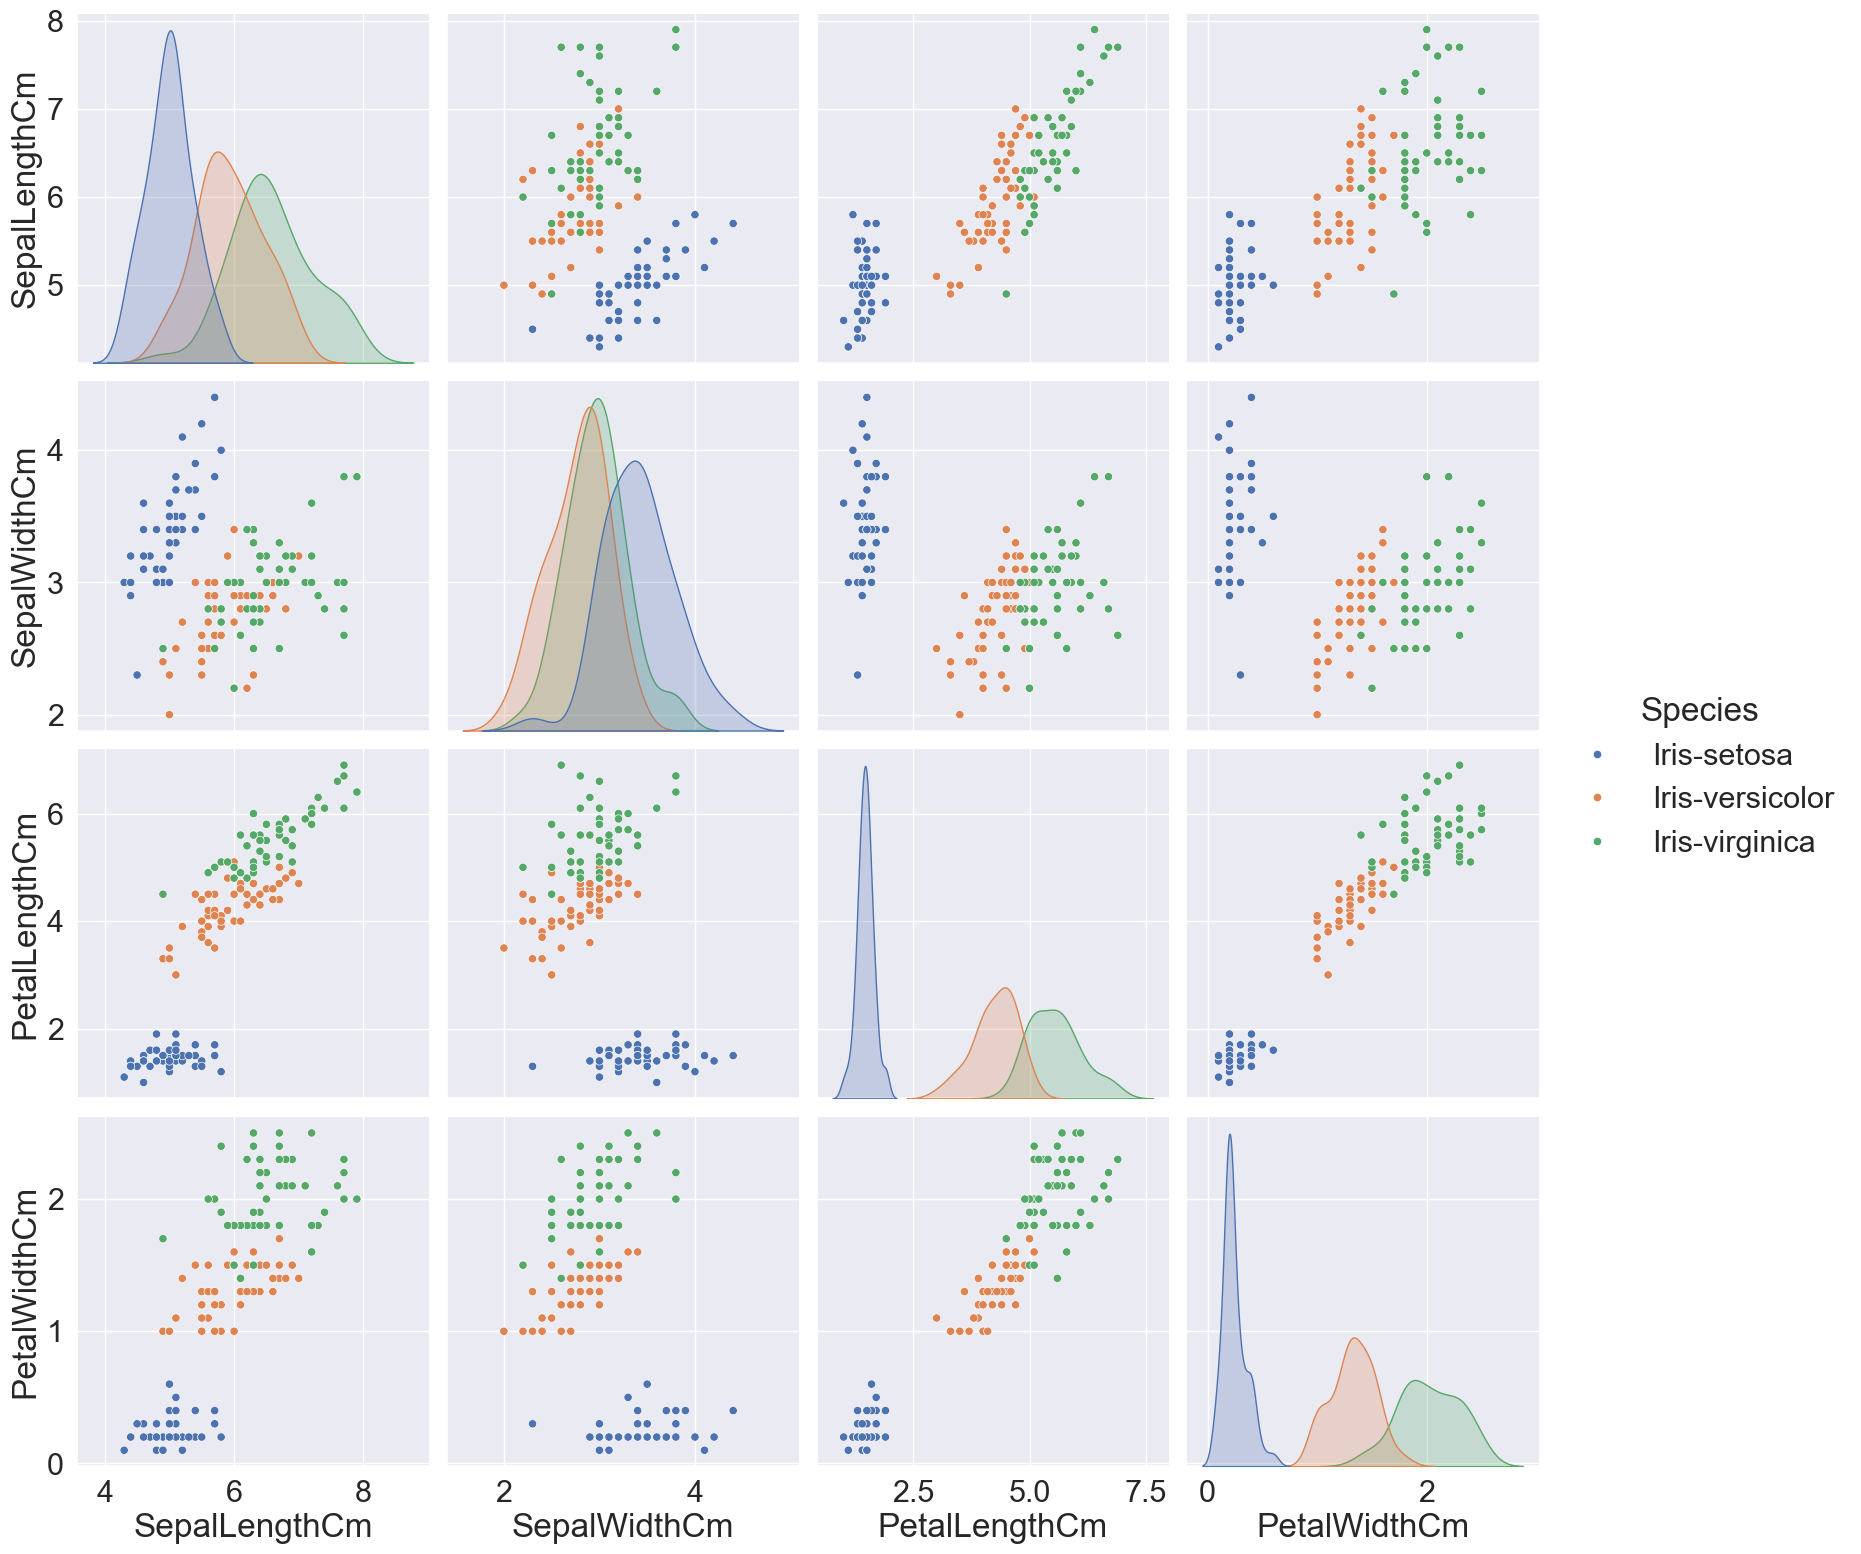

In [47]:
sns.pairplot(data=donnees.reset_index(),hue='Species',size=4);

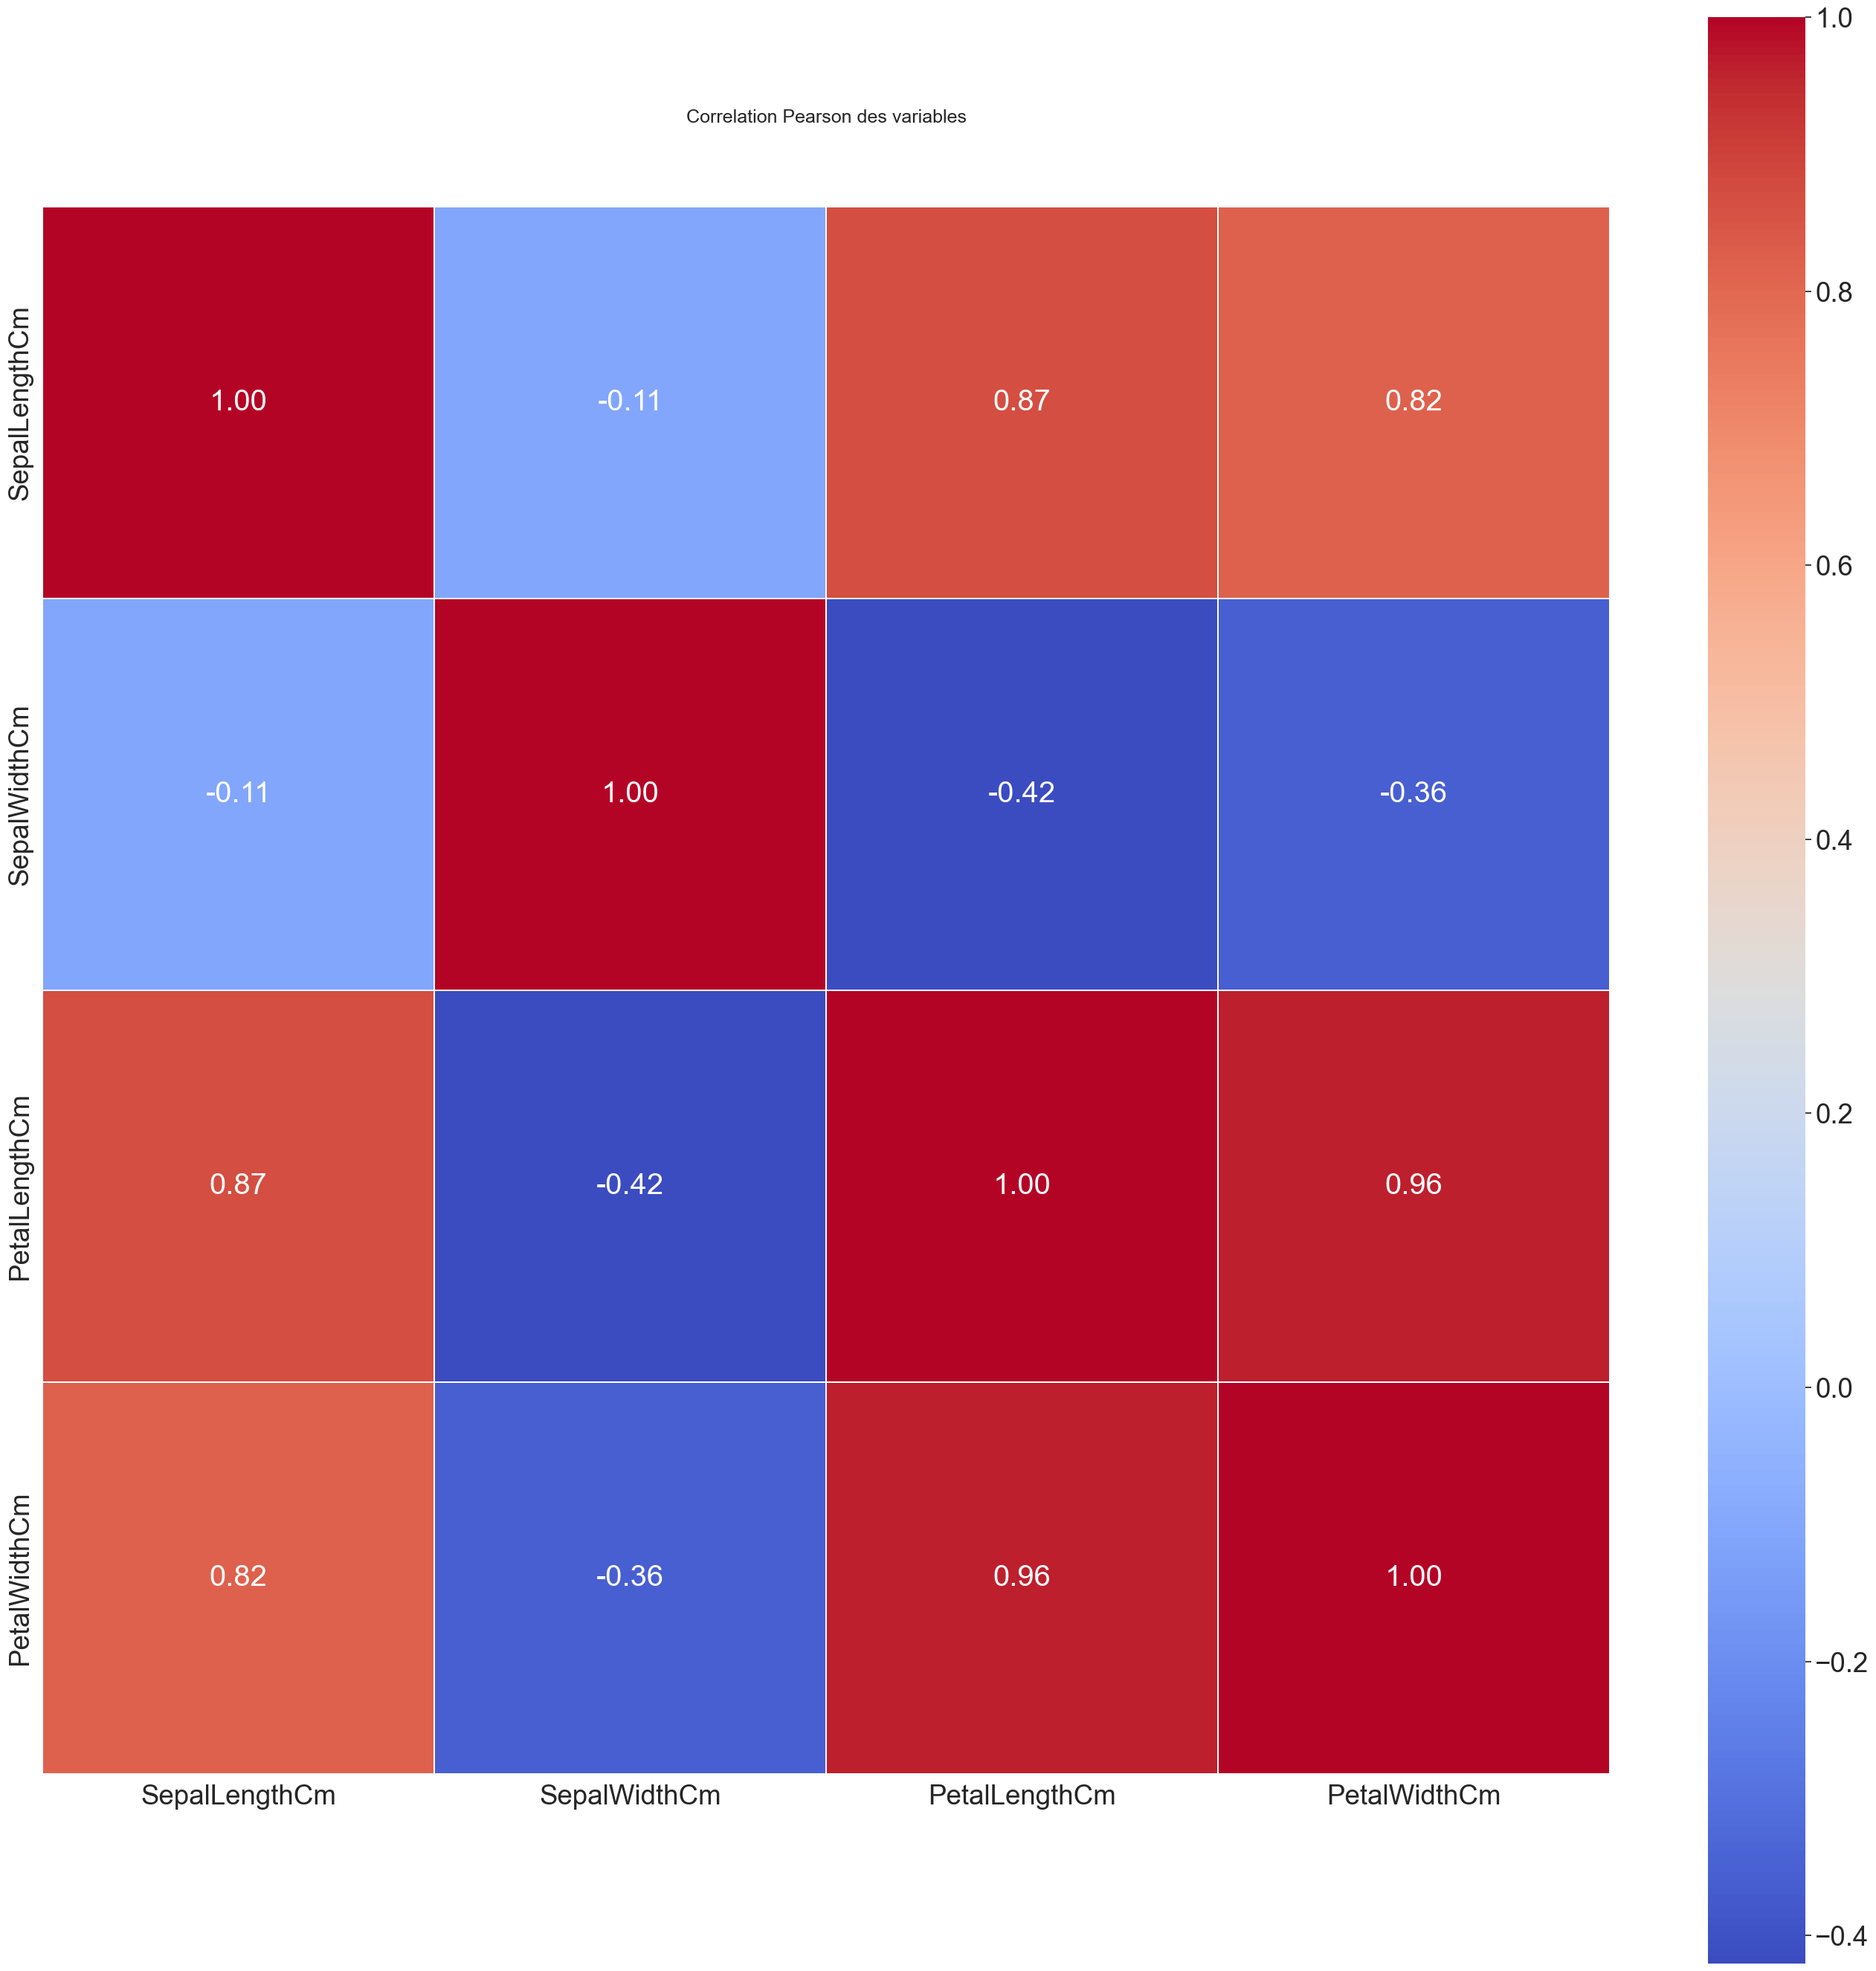

In [9]:
plt.figure(figsize=(34,34))
sns.set(font_scale=2.4)
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(donnees.corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True)
sns.set(font_scale=2)

In [10]:
x = donnees.values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
modelStd = StandardScaler()
modelStd.fit(x)
x = modelStd.transform(x)

In [11]:
pd.DataFrame(x, index=donnees.index, columns=donnees.columns)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
Iris-virginica,1.038005,-0.124958,0.819624,1.447956
Iris-virginica,0.553333,-1.281972,0.705893,0.922064
Iris-virginica,0.795669,-0.124958,0.819624,1.053537


In [12]:
X = pd.DataFrame(x, index=donnees.index, columns=donnees.columns)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

In [14]:
model = pca.fit(x)

# Le pourcentage d'inertie associée à chaque dimension

In [15]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [16]:
pca.explained_variance_ratio_.cumsum()*100

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [17]:
sum(pca.explained_variance_ratio_.cumsum()*100 <= 95) + 1

2

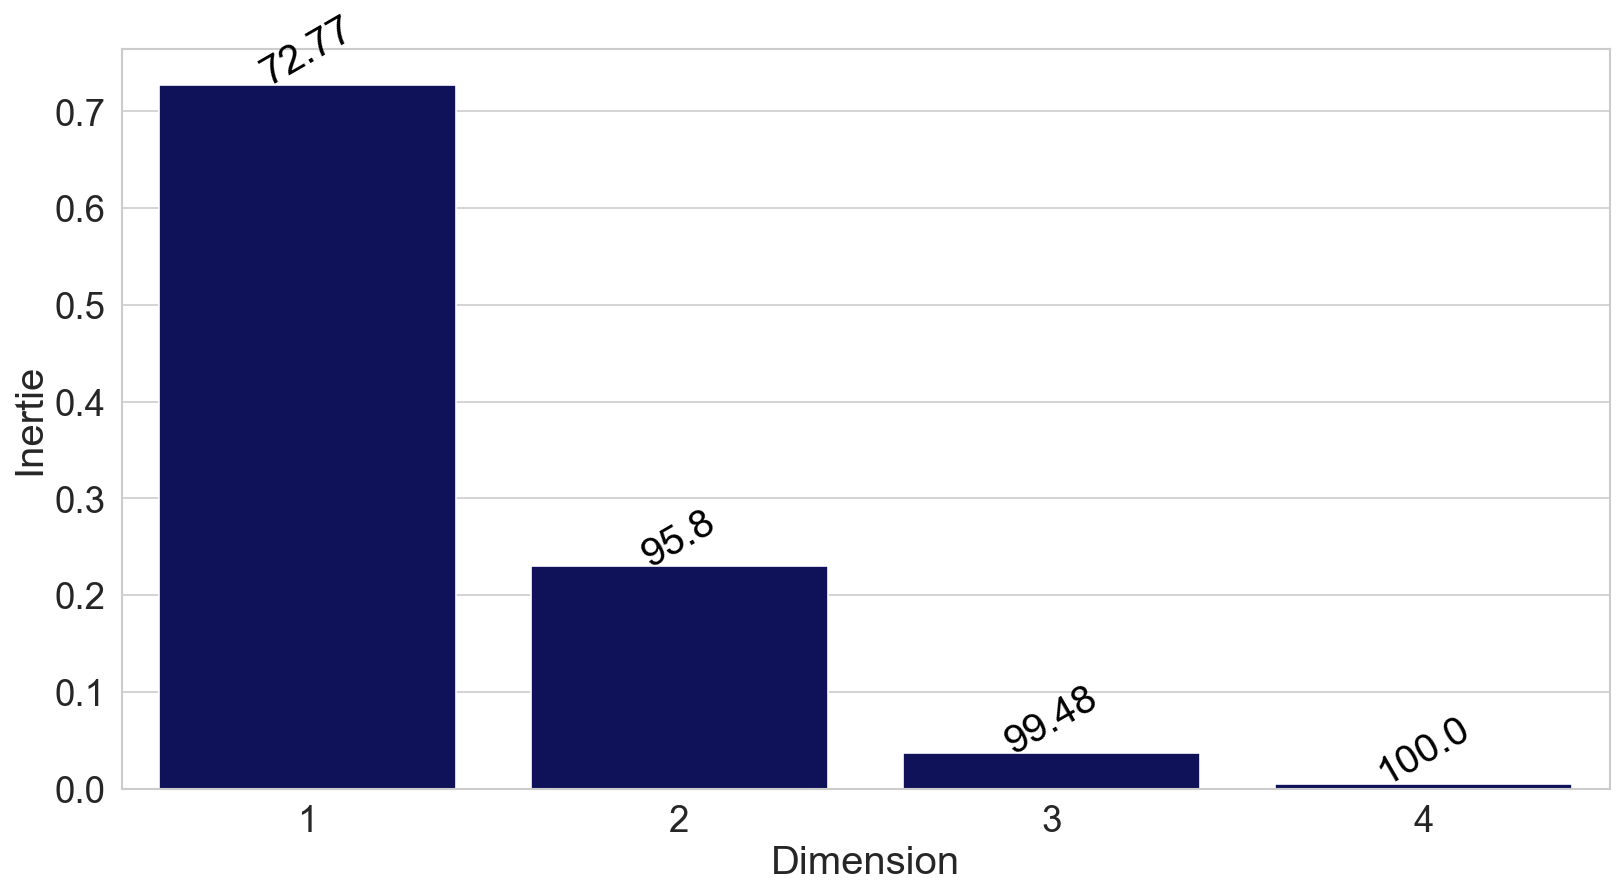

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=24)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,5)

plt.figure(figsize=(16,8),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764")

for index, row in inertie.iterrows():
    g.text(row.name,row.Inertie, row.label, color='black', ha="center", rotation=30)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)

plt.show()

# plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

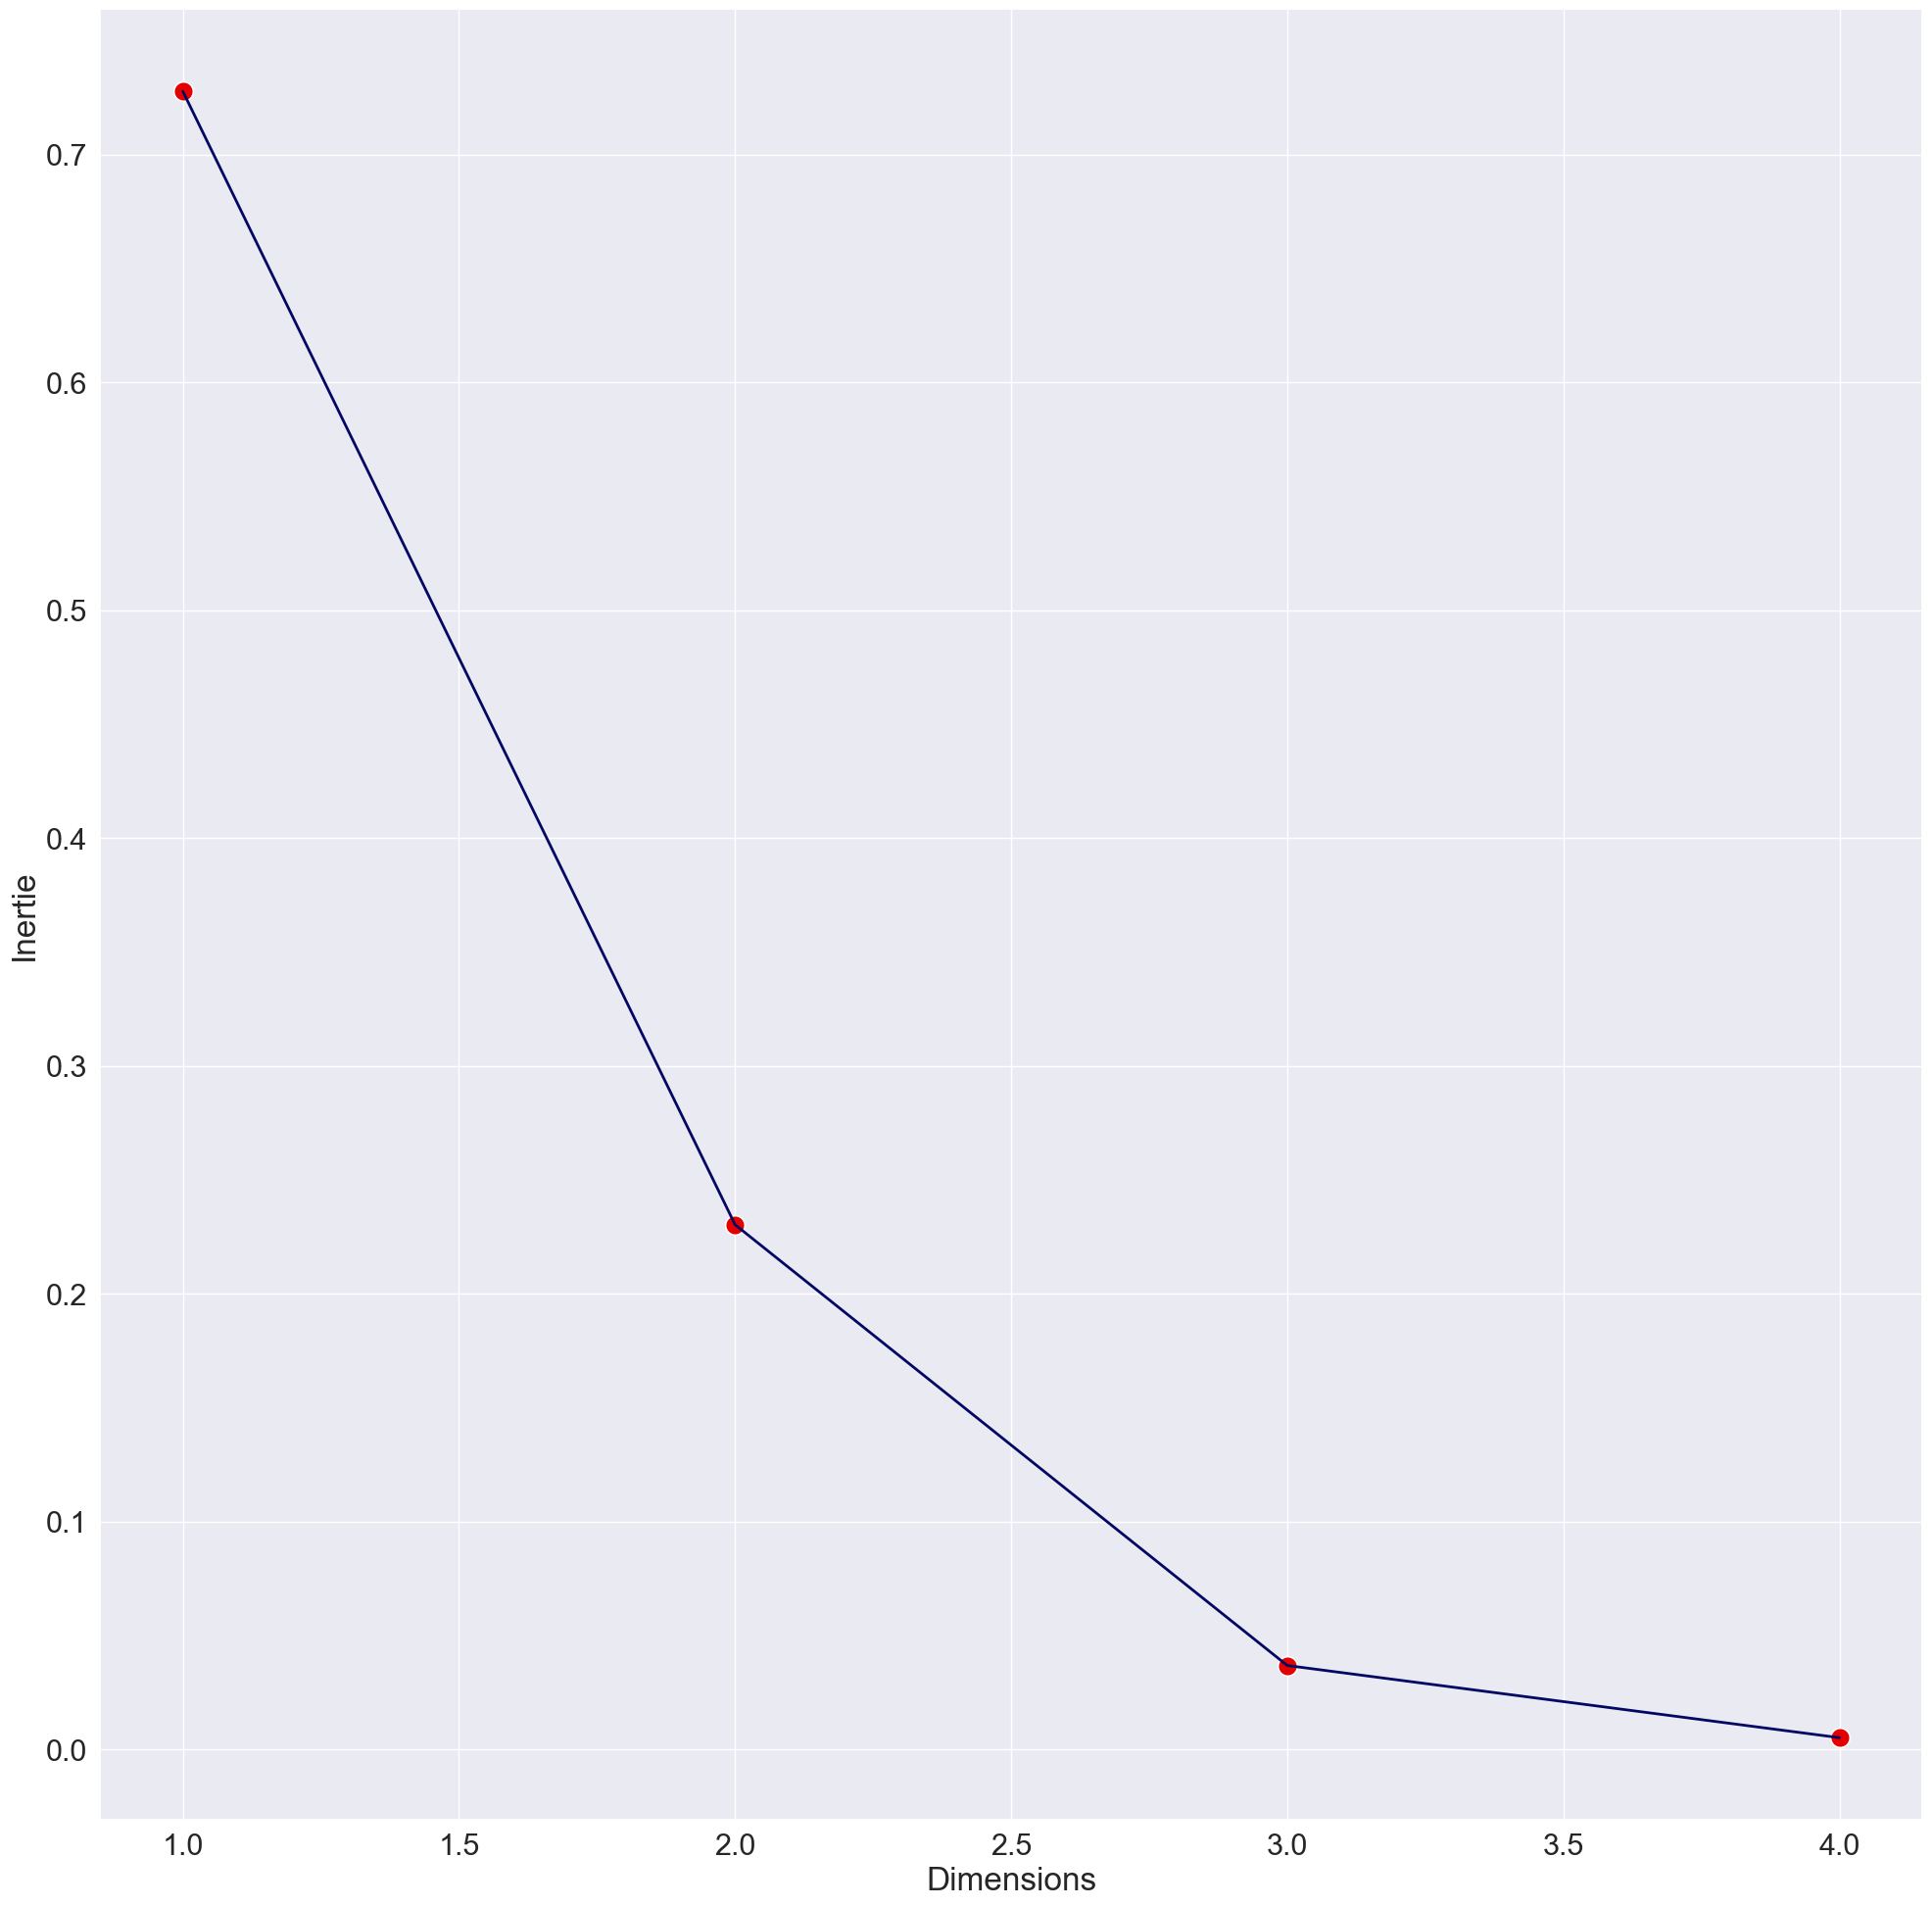

In [21]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      # ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                # ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

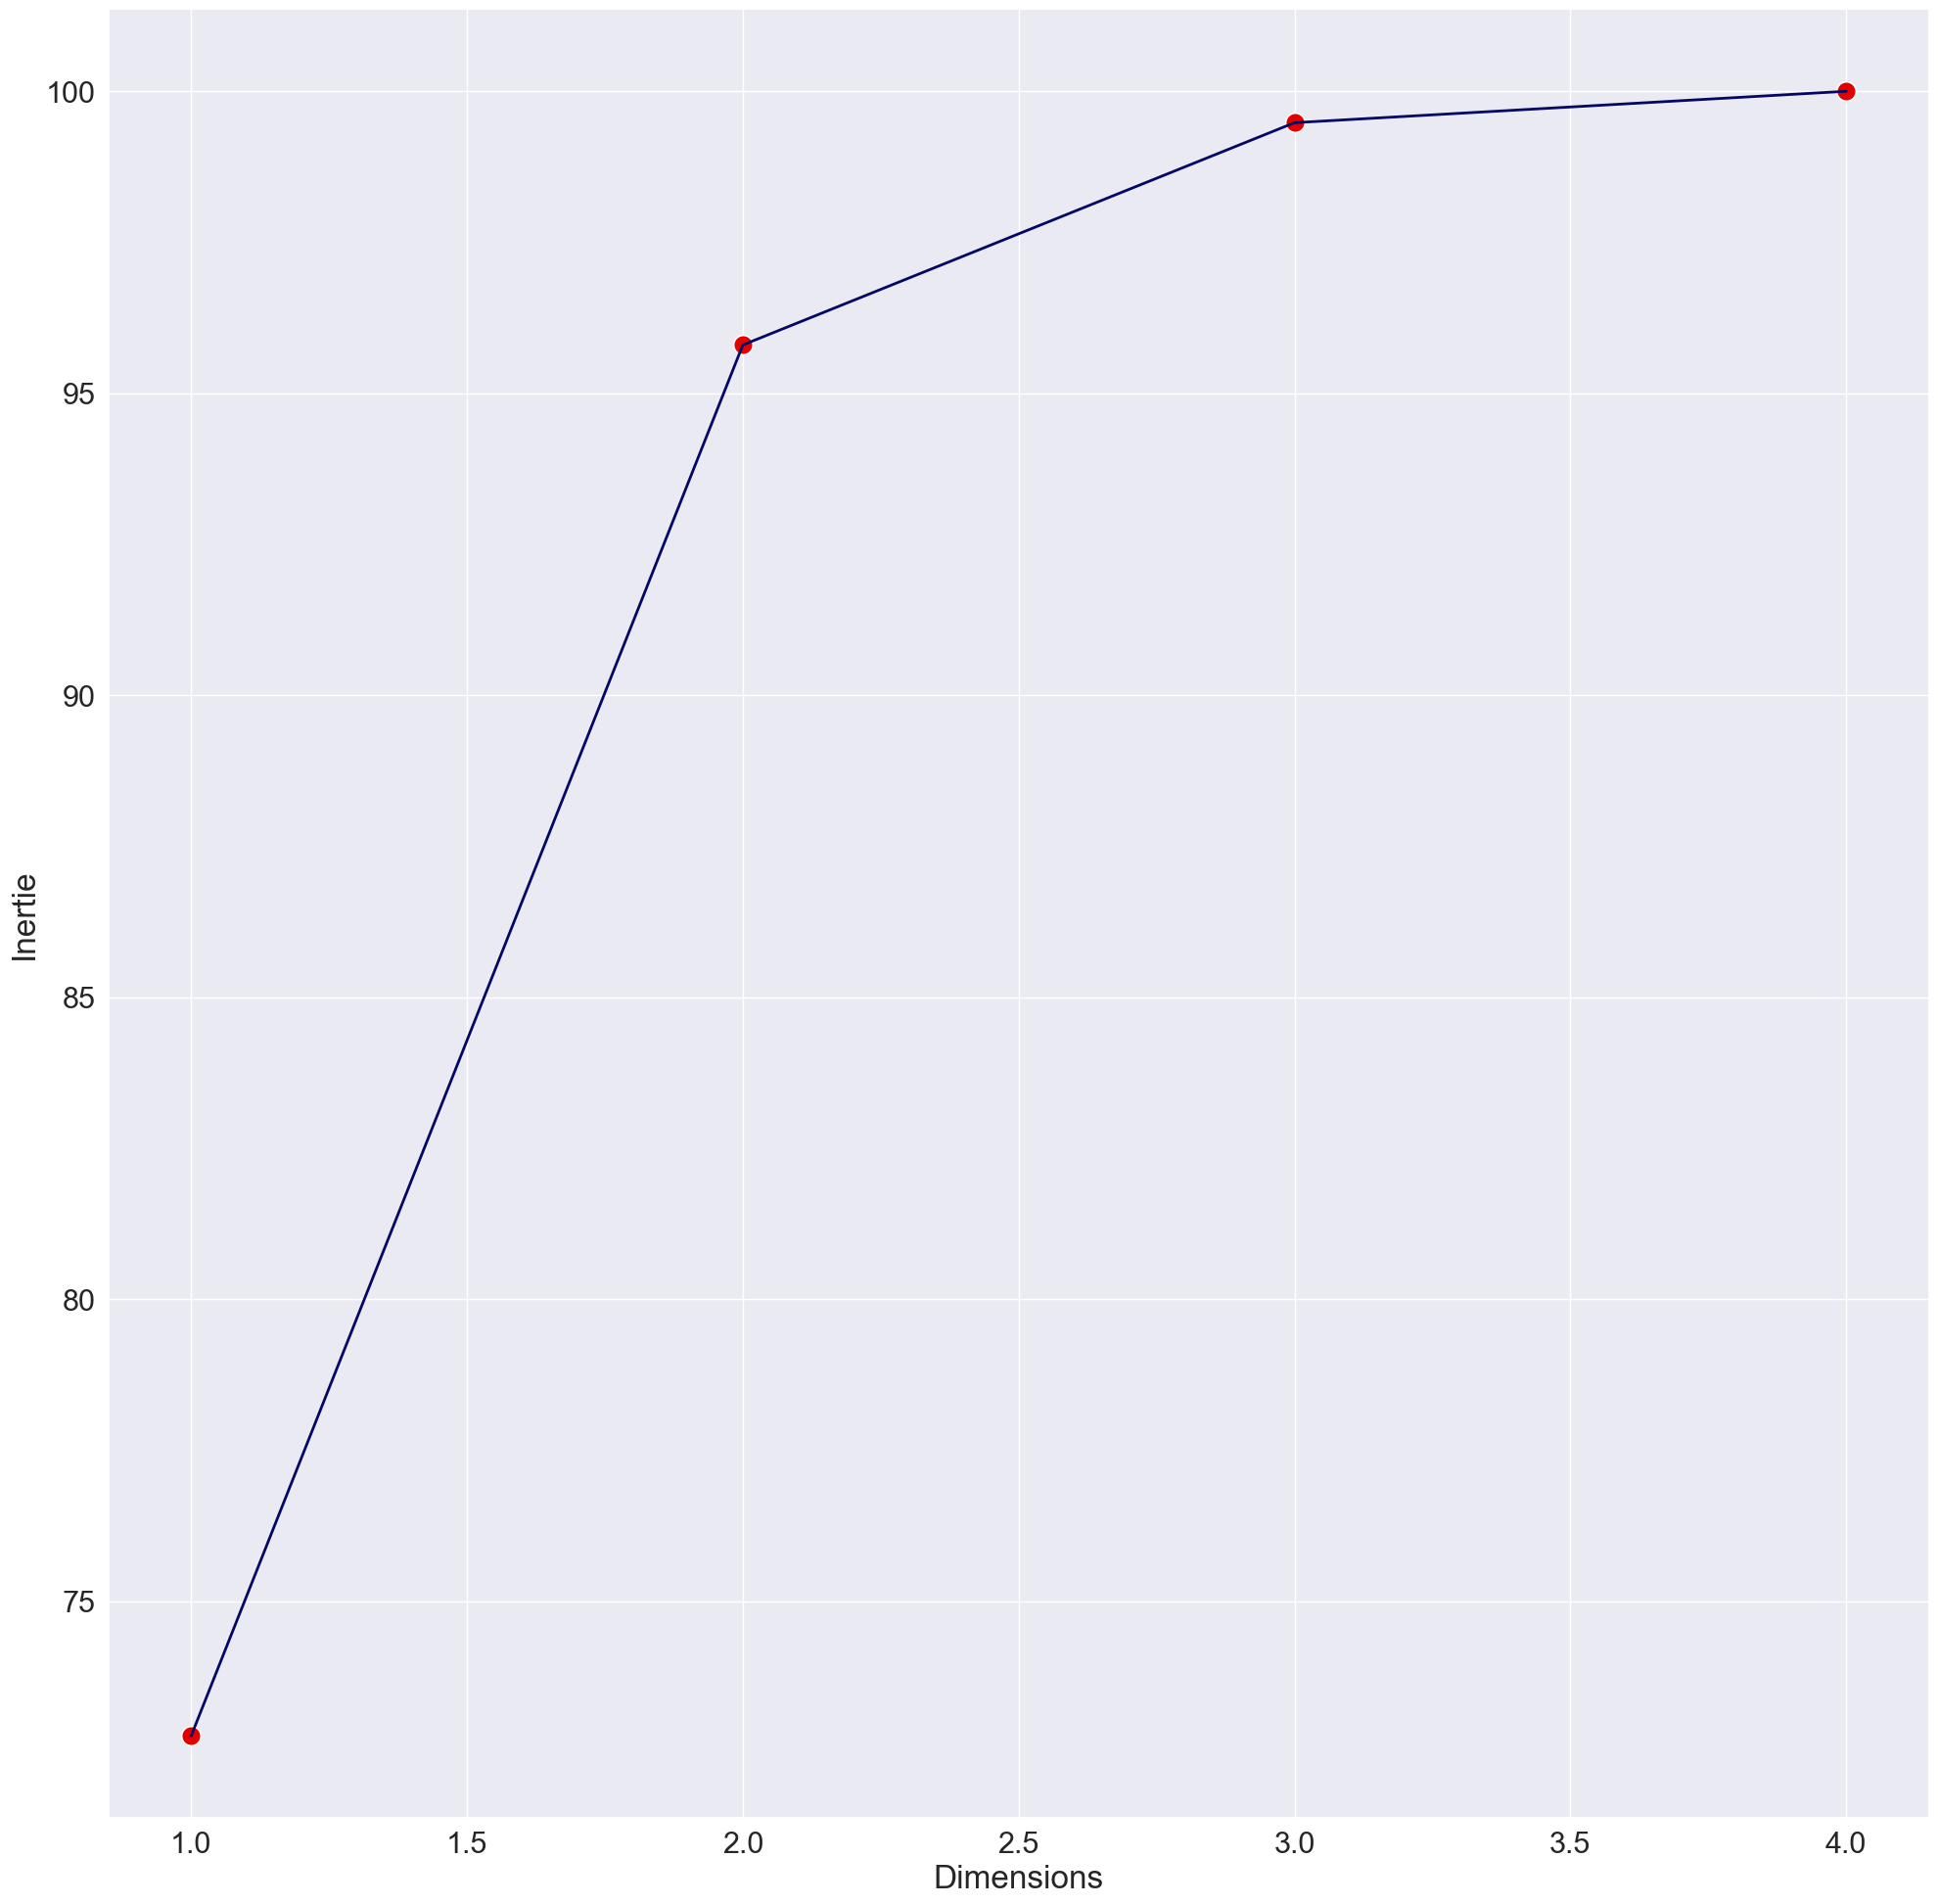

In [22]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='label',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'label',
                data  = inertie,
                s     = 200,
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

# L'influence des variables dans les nouvelles dimensions

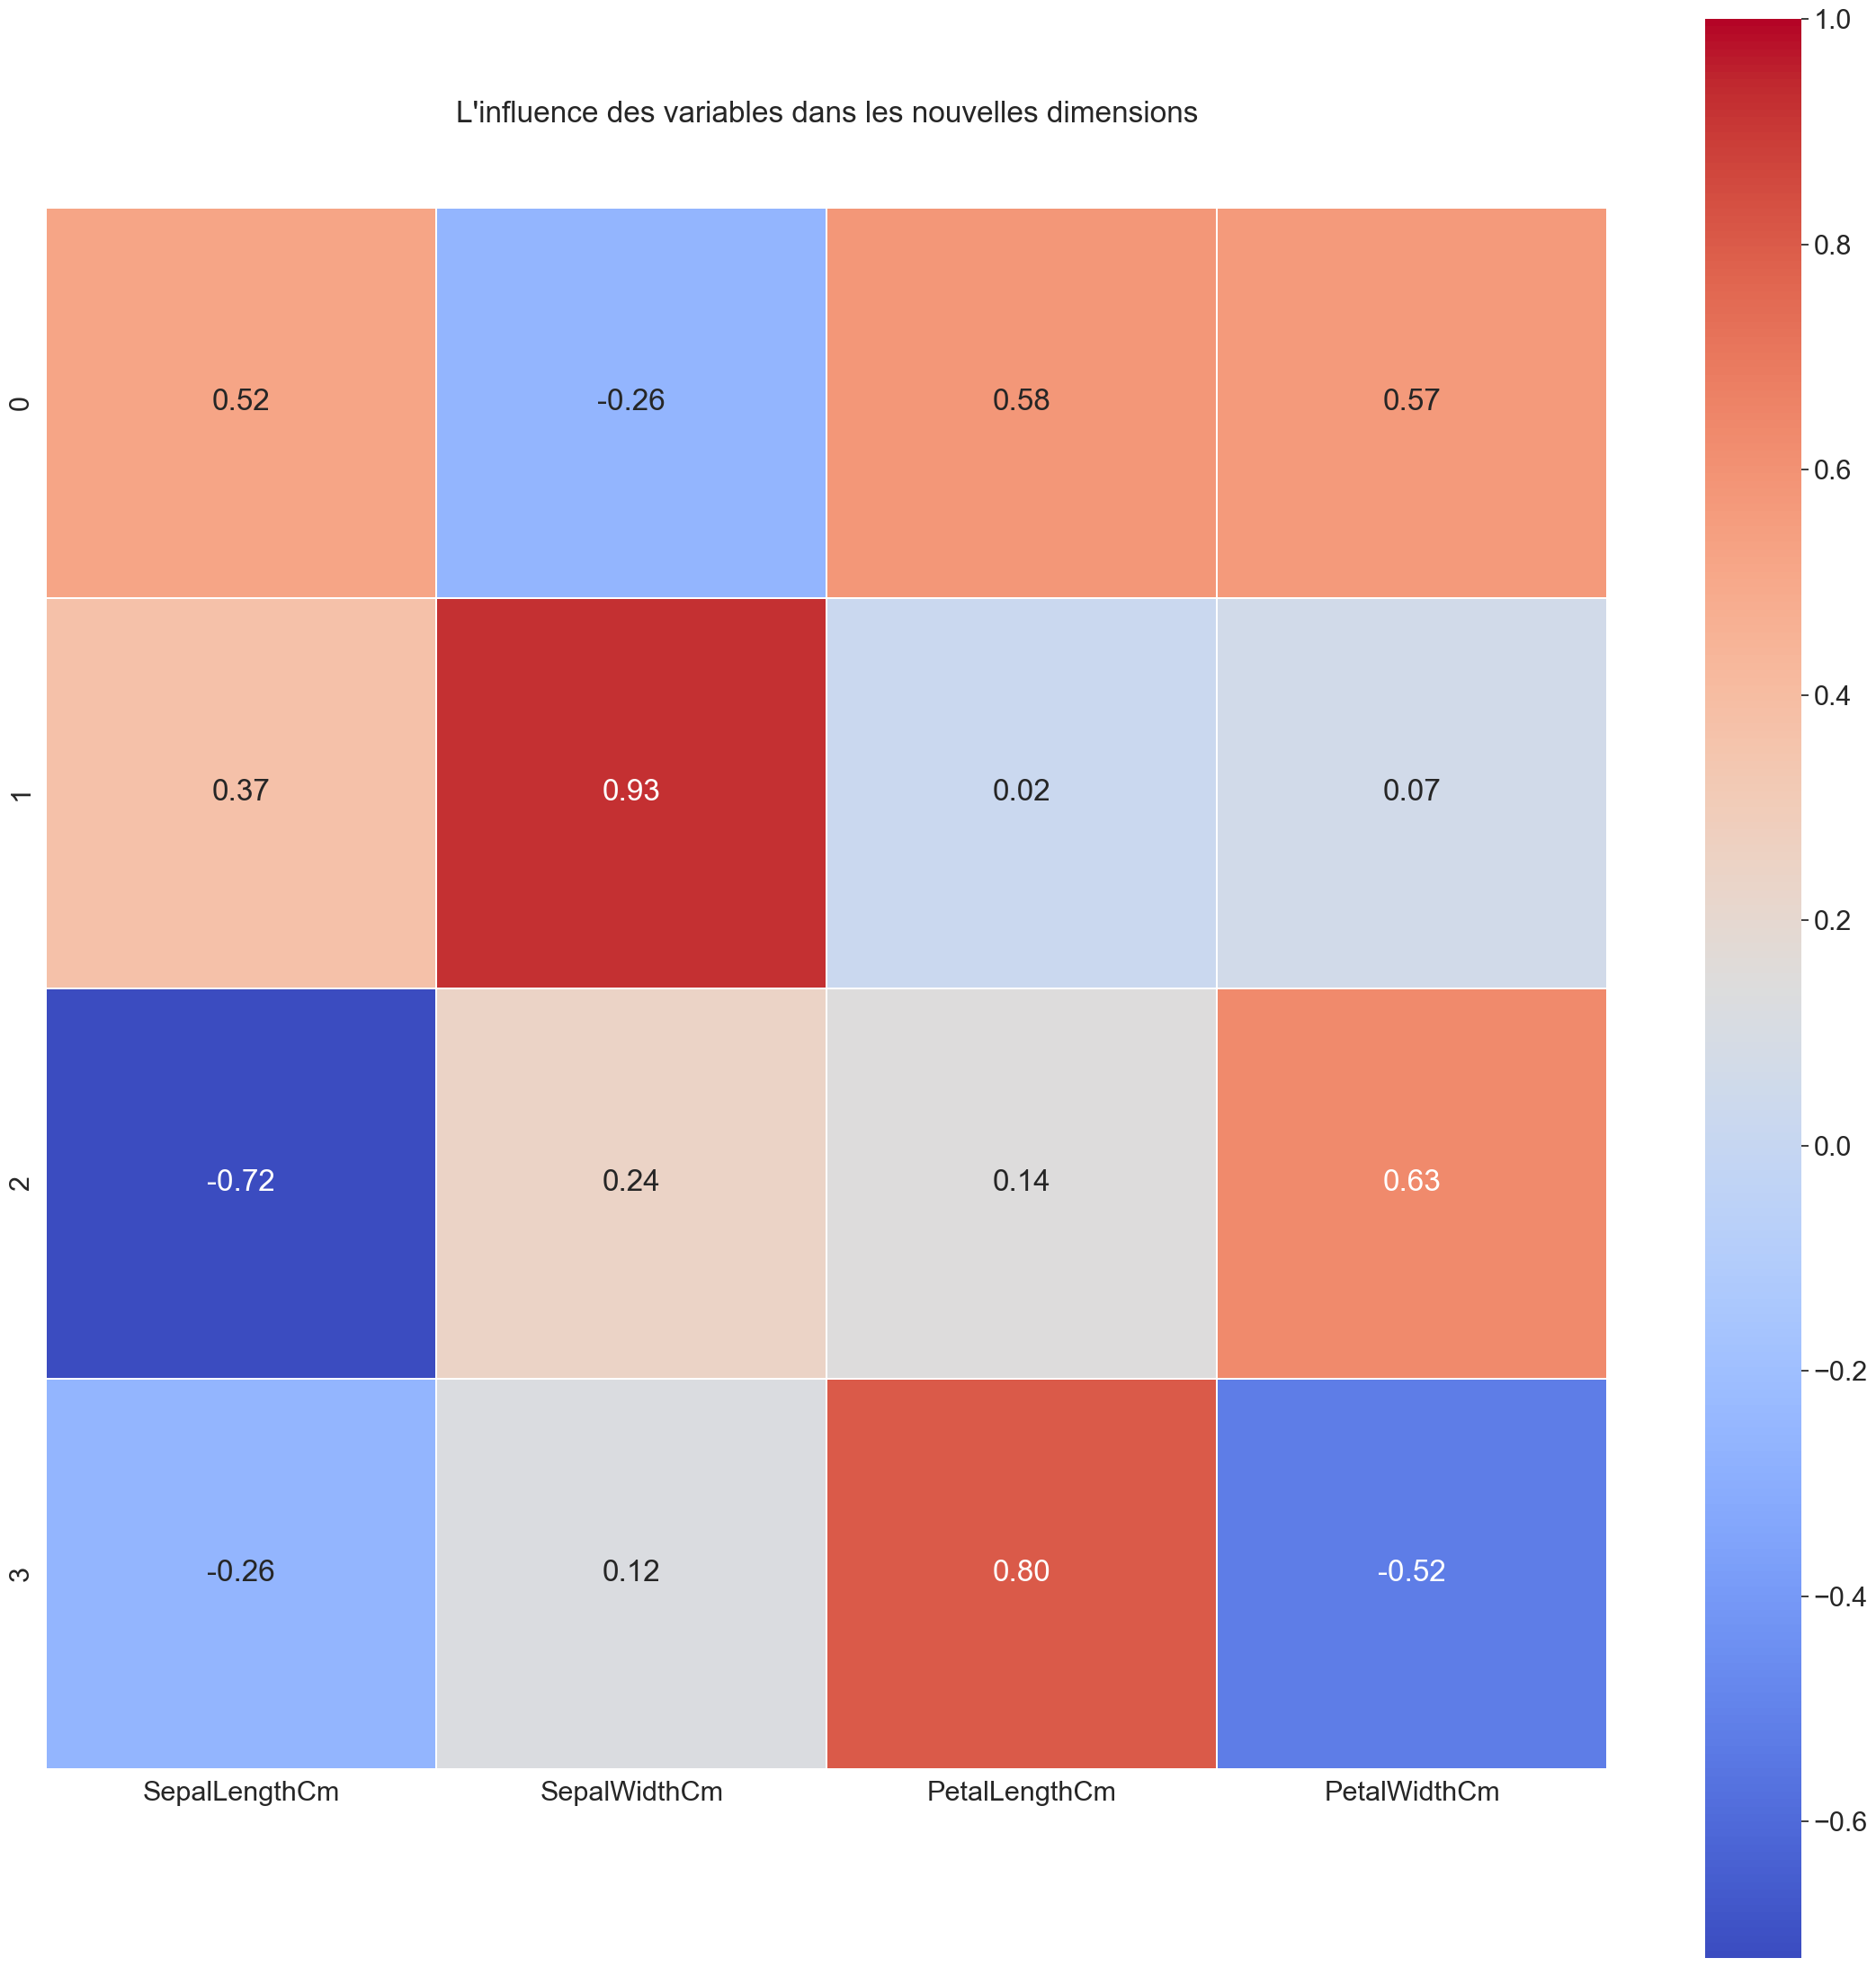

In [23]:
plt.figure(figsize=(28,28))
sns.set(font_scale=2)
plt.title("L'influence des variables dans les nouvelles dimensions", y=1.05, size=24)
sns.heatmap(pd.DataFrame(pca.components_, columns=X.columns),
            fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [24]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
from sklearn.decomposition import PCA
modelPCA = PCA(n_components=n_components)
x_proj = modelPCA.fit_transform(x)
donnees2d = pd.DataFrame(x_proj, index=donnees.index, columns=[f'Dim{i+1:02d}'for i in range(n_components)])

In [26]:
donnees2d.reset_index()

,Species,Dim01,Dim02
0,Iris-setosa,-2.264542,0.505704
1,Iris-setosa,-2.086426,-0.655405
2,Iris-setosa,-2.367950,-0.318477
3,Iris-setosa,-2.304197,-0.575368
4,Iris-setosa,-2.388777,0.674767
...,...,...,...
145,Iris-virginica,1.870522,0.382822
146,Iris-virginica,1.558492,-0.905314
147,Iris-virginica,1.520845,0.266795
148,Iris-virginica,1.376391,1.016362


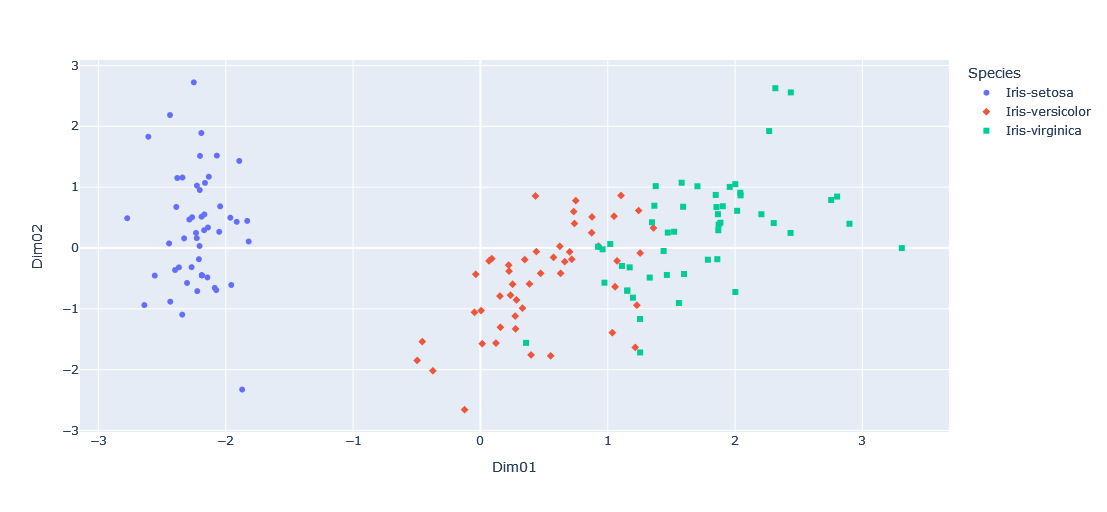

In [33]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    color='Species',
                    symbol='Species',
                    # text='Species',
                    width=996,
                    height=512,
                   )

fig.show()

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(donnees2d.values)
y_kmeans = kmeans.predict(donnees2d.values)
donnees2d['Km3'] = y_kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(donnees2d.values)
y_kmeans = kmeans.predict(donnees2d.values)
donnees2d['Km2'] = y_kmeans

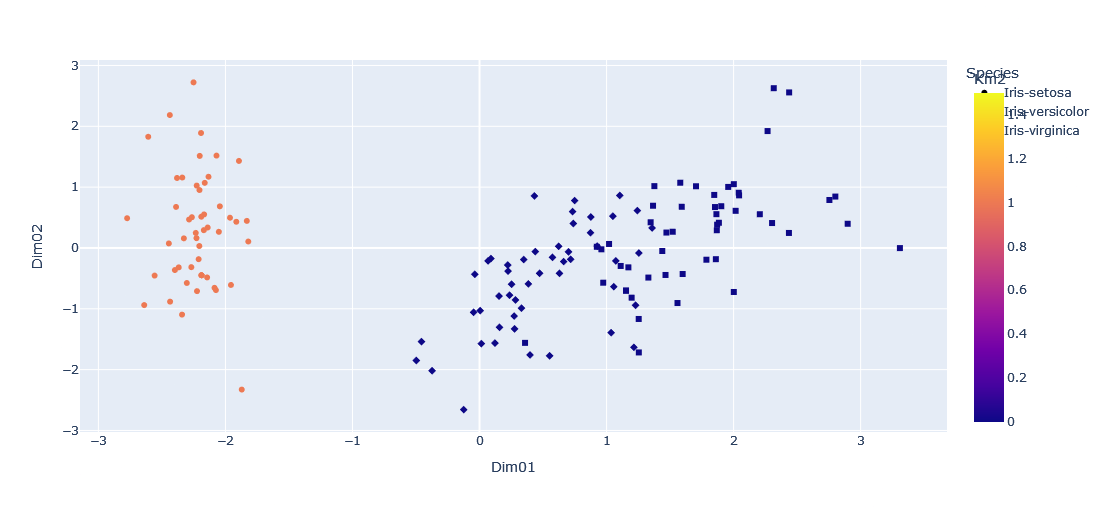

In [37]:
fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    color='Km2',
                    symbol='Species',
                    # text='Species',
                    width=996,
                    height=512,
                   )

fig.show()

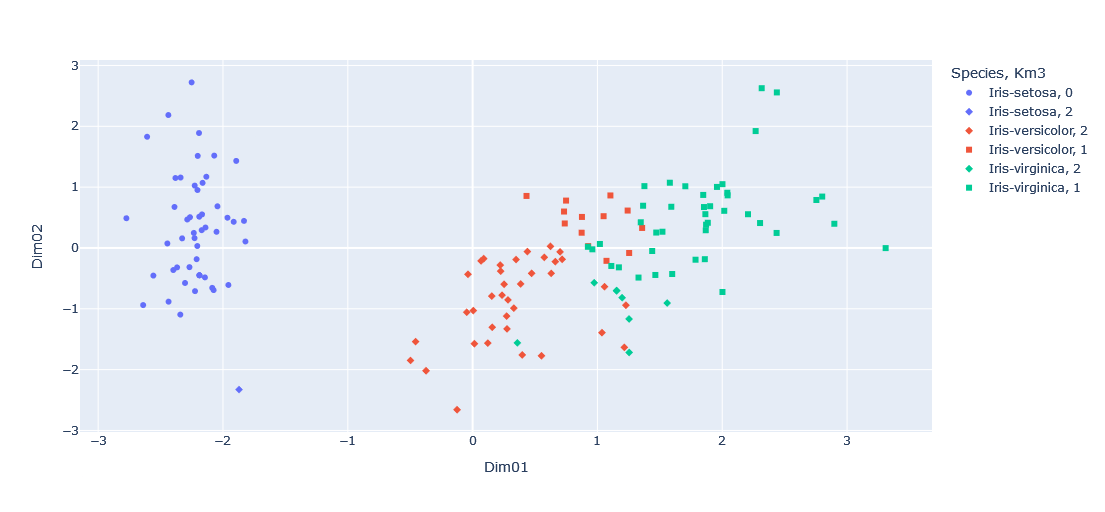

In [38]:
fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    color='Species',
                    symbol='Km3',
                    # text='Species',
                    width=996,
                    height=512,
                   )

fig.show()